### Question 7 : 
Write a Julia Snippet which includes a user defined function, call it "initial_data.jl" to define a function on a domain $$x\in[-10,10]$$ and generates a plot of the same.
 

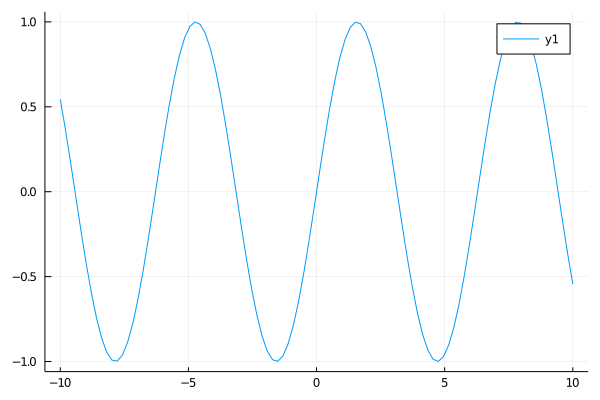

In [1]:
# include "intial_data.jl" that would have a function as myFunction 
using Plots

function myFunction(x)
   return sin.(x)
end

x = range(-10,10,length=100)
y = myFunction(x)
plot(x,y)

### Q8. 
Write a Julia Snippet which takes the function defined in the "initial_data.jl" and integrates it on the domain $$x\in[-10,10]$$

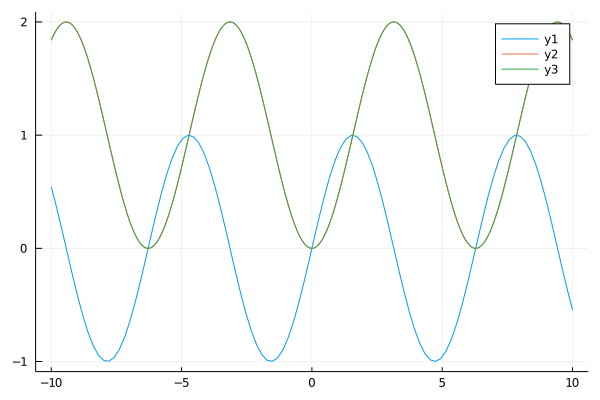

In [3]:
include("initial_data.jl")

# stepSize = 0.01
# println(x)
# sum=0

# for i in 

function integrate(startx, endx, stepSize)
    sum = 0
    invert = 1
    if(endx<startx)
        temp = endx
        endx = startx
        startx = temp
        invert = -1
    end
    # x = range(-10,10,step=stepSize)
    maxRange = (endx-startx)/stepSize
    for i in 0:maxRange
        xn = startx+(i*stepSize)
        if (i==0 || i==maxRange)
            sum = sum+myFunction(xn)
        elseif(mod(i,2)==1)
            sum = sum+(4*myFunction(xn))
        elseif(mod(i,2)==0)
            sum = sum+(2*myFunction(xn))
        end
    end
    return (invert*sum*stepSize/3)

end

x = range(-10,10,step = 0.001)
y = Vector{Float64}()
# print(integrate(0,-10,0.1))
for i in eachindex(x)
    push!(y,integrate(0,x[i],0.001))
end
plot!(x,y)

### Q9. 
Write a Julia Snippet to generate a table giving co-efficients of the second derivative expansion in terms of the discretized function elements.